# ANÁLISIS Y PREDICCIÓN DE TSUNAMIS: *Un enfoque basado en datos sísmicos* 

### TEMA

Análisis y modelado a partir del histórico de terremotos y tsunamis para desarrollar un sistema de predicción y zonificación del riesgo de ocurrencia de tsunamis que pueda facilitar la toma de decisiones en la gestión de dichos desastres naturales.

### OBJETIVOS

* **Objetivo 1**: predecir la ocurrencia de un tsunami en función de un posible terremoto.

* **Objetivo 2**: para un lugar elegido, obtener la probabilidad de ocurrencia de terremotos significativos o tsunamis (zonificación con mapa de calor de riesgos).

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

### PRINCIPAL FUENTE DE DATOS:

API web nortamericana de la Administración nacional oceánica y atmosférica NOAA

https://www.ngdc.noaa.gov/hazel/view/hazards/tsunami/event-search/






### FUENTES DE DATOS ALTERNATIVA:
Datasets con datos reales de Kaggle:

* Terremotos (1900-2025):

https://www.kaggle.com/datasets/usamabuttar/significant-earthquakes


* Tsunamis (1900-2023):

https://www.kaggle.com/datasets/harshalhonde/tsunami-events-dataset-1900-present/


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [16]:
earthquakes=pd.read_csv(r'C:\Users\isabe\Documents\Thebridge\Machine learning datasets\Earthquakes\Significant_Earthquakes.csv')
display(earthquakes.head(5))
print(earthquakes.shape)

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,0,1900-10-09T12:25:00.000Z,57.09,-153.48,NaN,7.86,mw,NaN,NaN,NaN,NaN,ushis,ushis391,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1,1901-03-03T07:45:00.000Z,36.00,-120.50,NaN,6.40,ms,NaN,NaN,NaN,NaN,ushis,ushis393,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,2,1901-07-26T22:20:00.000Z,40.80,-115.70,NaN,5.00,fa,NaN,NaN,NaN,NaN,ushis,ushis395,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,3,1901-12-30T22:34:00.000Z,52.00,-160.00,NaN,7.00,ms,NaN,NaN,NaN,NaN,ushis,ushis397,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,4,1902-01-01T05:20:30.000Z,52.38,-167.45,NaN,7.00,ms,NaN,NaN,NaN,NaN,ushis,ushis400,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe


(107950, 23)


In [8]:
tsunami=pd.read_csv(r'C:\Users\isabe\Documents\Thebridge\Machine learning datasets\Earthquakes\tsunamis-2023-09-11_22-13-51_ 0530 (2).csv')

In [18]:
display(tsunami)
print(tsunami.shape)

,Sr.no,Year,Mo,Dy,Hr,Mn,Sec,TsunamiNanEventNanValidity,TsunamiNanCauseNanCode,EarthquakeNanMagnitude,Vol,MoreNanInfo,Deposits,Country,LocationNanName,Latitude,Longitude,MaximumNanWaterNanHeightNan(m),NumberNanofNanRunups,TsunamiNanMagnitudeNan(Abe),TsunamiNanMagnitudeNan(Iida),TsunamiNanIntensity,Deaths,DeathNanDescription,Missing,MissingNanDescription,Injuries,InjuriesNanDescription,DamageNan($Mil),DamageNanDescription,HousesNanDestroyed,HousesNanDestroyedNanDescription,HousesNanDamaged,HousesNanDamagedNanDescription,TotalNanDeaths,TotalNanDeathNanDescription,TotalNanMissing,TotalNanMissingNanDescription,TotalNanInjuries,TotalNanInjuriesNanDescription,TotalNanDamageNan($Mil),TotalNanDamageNanDescription,TotalNanHousesNanDestroyed,TotalNanHousesNanDestroyedNanDescription,TotalNanHousesNanDamaged,TotalNanHousesNanDamagedNanDescription
0,1,1900,1.0,10.0,NaN,NaN,NaN,1,1,NaN,NaN,NaN,0,INDONESIA,"GALELA,NanHALMAHERANanISLAND",1.820,127.850,NaN,1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1900,8.0,11.0,4.0,40.0,NaN,4,3,NaN,NaN,NaN,0,USA,"LITUYANanBAY,NanAK",58.600,-137.500,NaN,1,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,3,1900,9.0,10.0,21.0,30.0,NaN,4,1,6.8,NaN,NaN,0,PAPUANanNEWNanGUINEA,BISMARCKNanSEA,-4.000,152.000,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,4,1900,9.0,17.0,21.0,45.0,NaN,3,1,7.1,NaN,NaN,0,PAPUANanNEWNanGUINEA,RABAULNanHARBOR,-5.000,148.000,3.00,1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1900,10.0,7.0,21.0,4.0,NaN,3,1,6.9,NaN,NaN,0,INDONESIA,BISMARCKNanSEA,-4.000,140.000,NaN,4,NaN,1.0,1.5,5.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1439,2023,4.0,24.0,20.0,0.0,57.0,4,1,7.1,NaN,NaN,0,INDONESIA,SW.NanSUMATRA,-0.799,98.524,0.10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1439,1440,2023,5.0,5.0,5.0,42.0,4.0,4,1,6.2,NaN,NaN,0,JAPAN,"NOTONanPENINSULA,NanJAPAN",37.540,137.305,0.10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,34.0,1.0,NaN,2.0,3.0,1.0,351.0,3.0
1440,1441,2023,5.0,19.0,2.0,57.0,6.0,4,1,7.7,NaN,NaN,0,NEWNanCALEDONIA,LOYALTYNanISLANDS,-23.229,170.694,0.61,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1441,1442,2023,5.0,20.0,1.0,51.0,1.0,4,1,7.1,NaN,NaN,0,NEWNanCALEDONIA,LOYALTYNanISLANDS,-23.062,170.456,0.14,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(1443, 46)


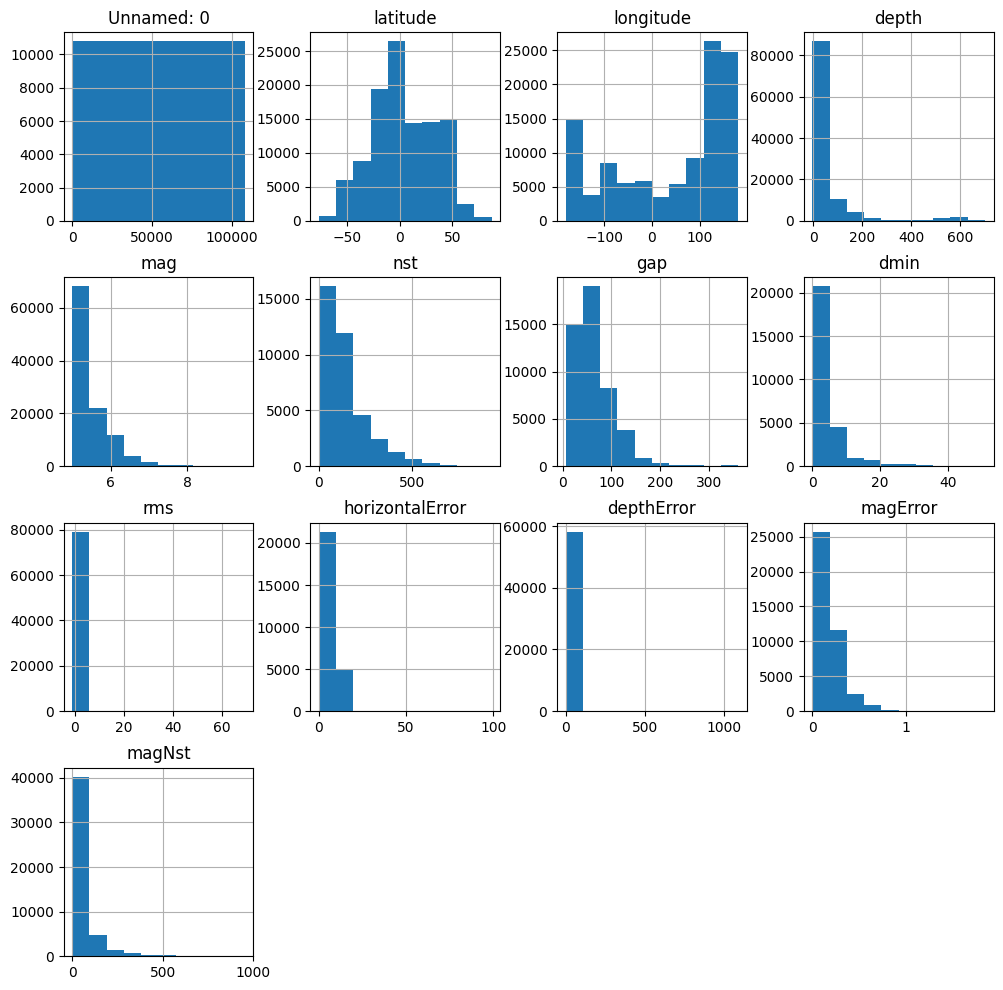

In [7]:
earthquakes.hist(figsize=(12,12));

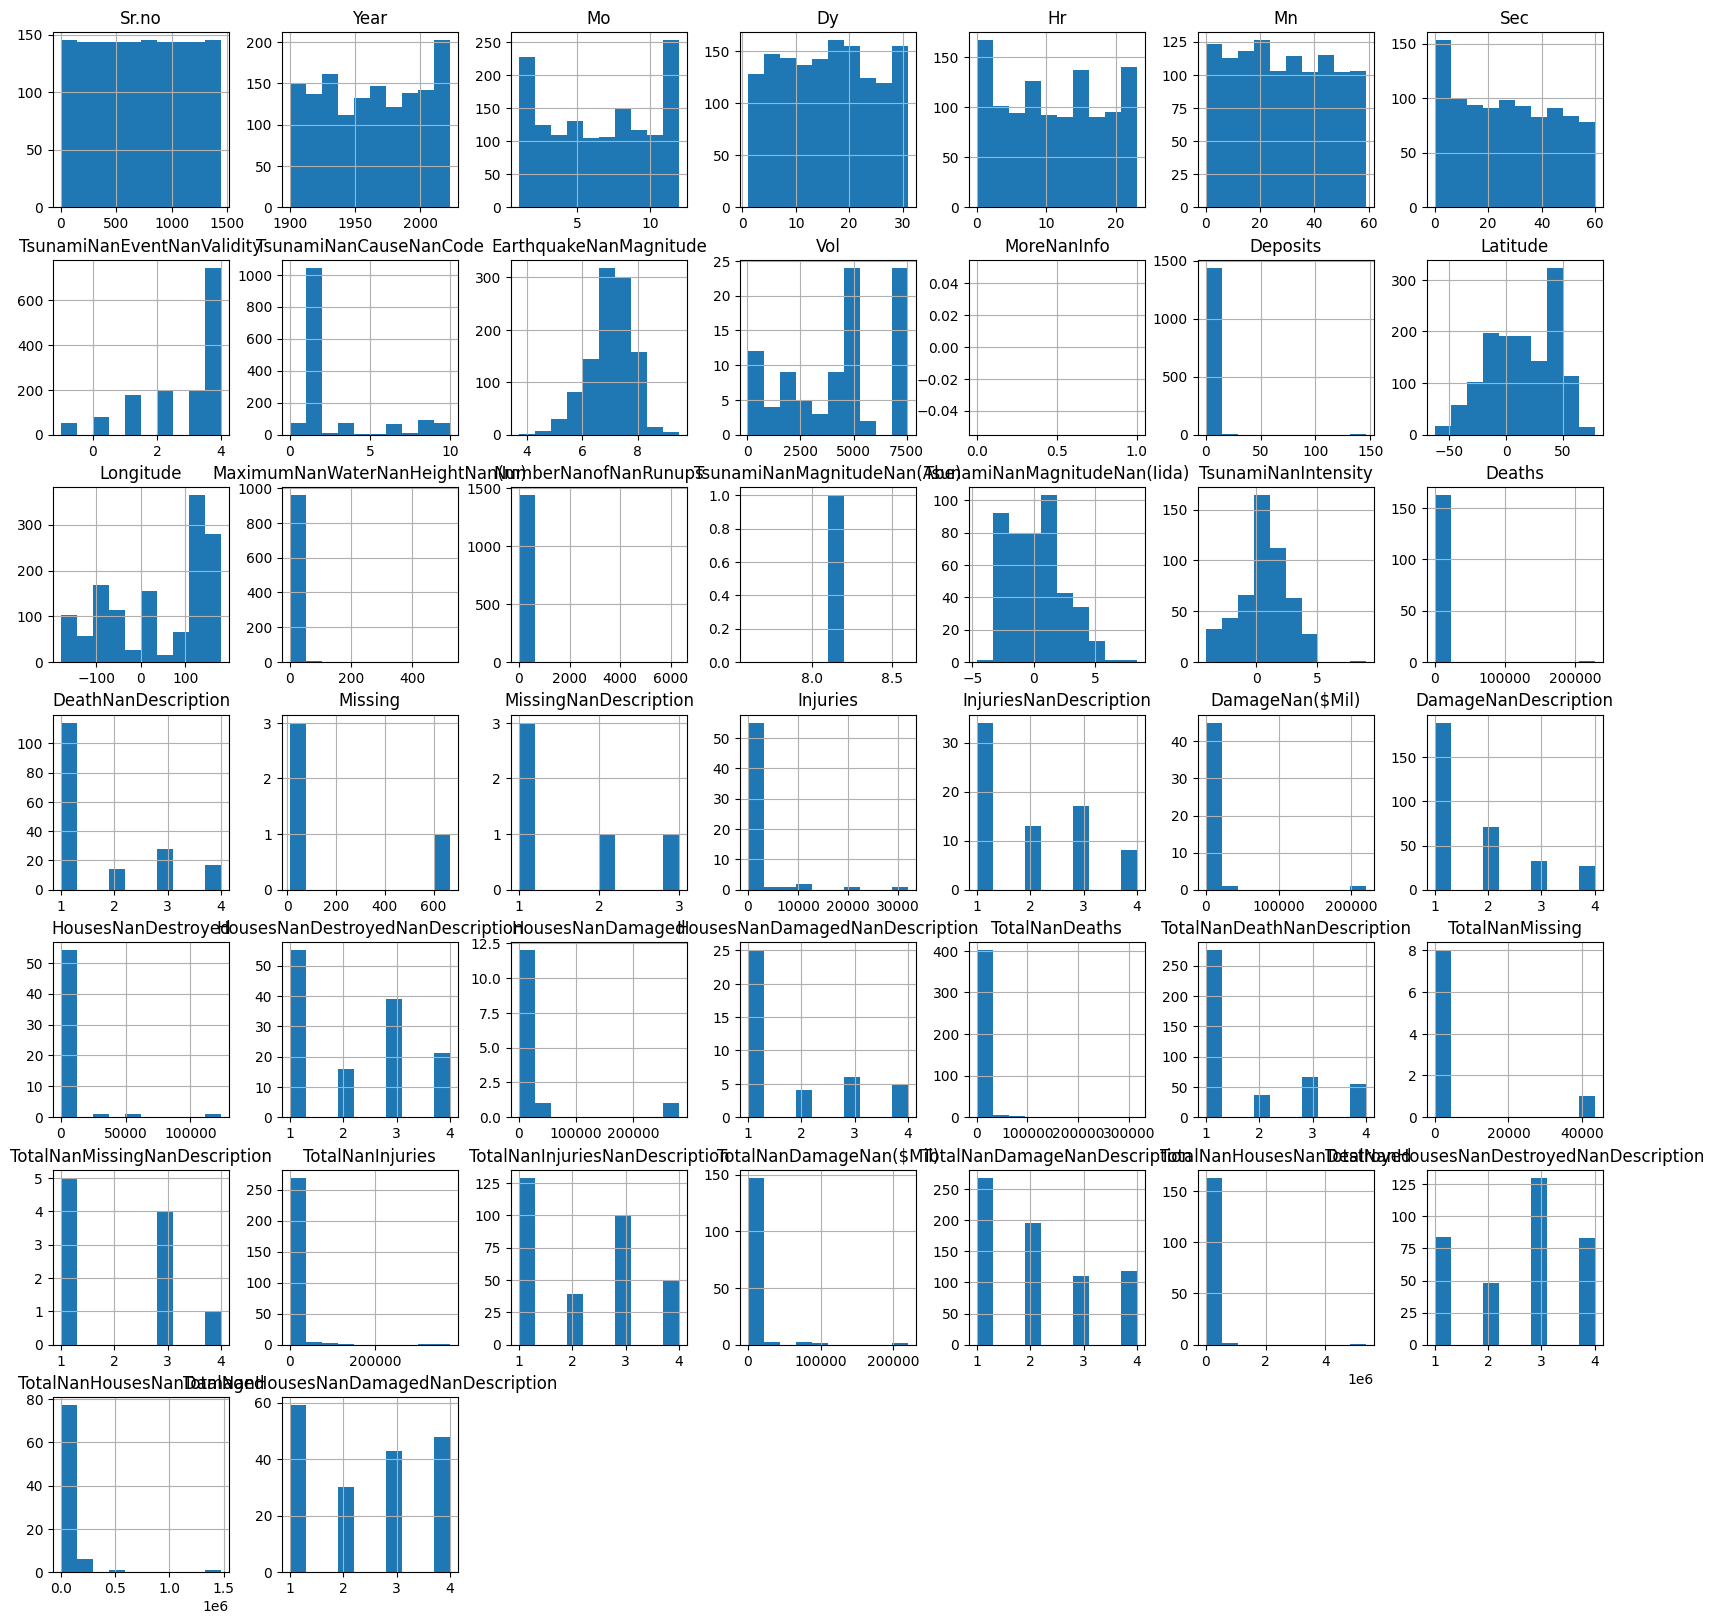

In [11]:
tsunami.hist(figsize=(20,20));